このノートでは、主成分分析がうまくいく例と行かない例を示す。

散布図内で示されたベクトルは、第一主成分の方向を示す。データ生成とPCAの適用を10回繰り返しているが、ベクトルが同じ直線状に載っていれば、安定して分散最大の方向を取れたことになる。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import make_moons

plt.style.use("ggplot")

# うまくいく例

## 相関のある多変量正規分布

correlation coefficients: 0.152 - 0.461


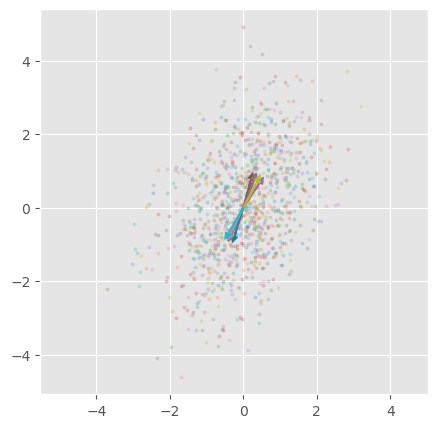

In [2]:
N = 100
n_iter = 10
cm = plt.cm.tab10

rng = np.random.default_rng(123)


def show_principal(f):
    corrs = []
    plt.figure(figsize=(5,5))
    plt.axis("equal")

    for i in range(n_iter):
        x = f()
        corrs.append(np.corrcoef(x[:,0], x[:,1])[0,1])
        model = PCA(2)
        model.fit(x)
        plt.scatter(x[:,0], x[:,1], s=5, color=cm(i), alpha=0.2)
        plt.annotate("", (model.components_[0]),(0,0), arrowprops={"color": cm(i), "width":1, "headwidth":5, "headlength":5})

    print("correlation coefficients: {:.3f} - {:.3f}".format(np.min(corrs), np.max(corrs)))
    plt.show()


show_principal(lambda: rng.multivariate_normal(mean=[0,0], cov=[[1,0.5], [0.5, 2]], size=N))

## 離散的だが５段階あり、相関もある

correlation coefficients: 0.691 - 0.785


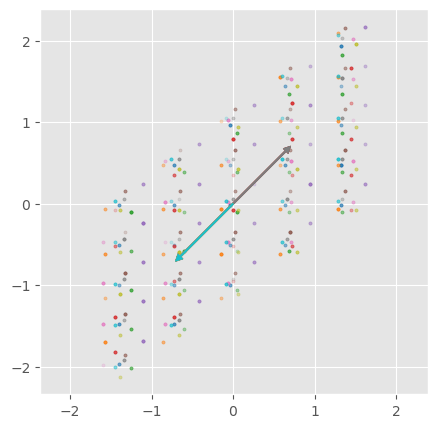

In [3]:
def func(rng):
    x1 = np.random.choice(5, N)
    x2 = x1 + np.random.choice([-2, -1, 0, 1, 2], size=N)
    x = np.stack([x1, x2]).T
    # 標準化する
    return (x - x.mean(axis=0)) / x.std(axis=0)

show_principal(lambda: func(rng))

# うまくいかない例
## 相関のない多変量正規分布

correlation coefficients: -0.063 - 0.072


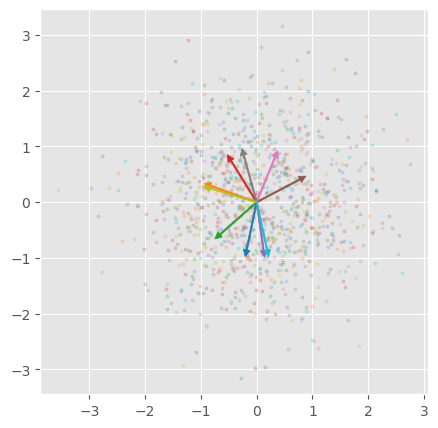

In [4]:
show_principal(lambda: rng.normal(size=(N,2)))

## ダミー変数（相関はある）

方向は取れているが、散布図からわかるように解釈が困難

correlation coefficients: 0.290 - 0.587


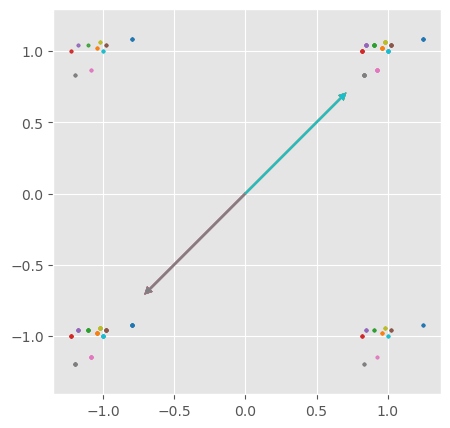

In [5]:
def func(rng):
    x1 = np.random.choice([0,1], N)
    p=[[0.7, 0.3] if i == 0 else [0.3,0.7] for i in x1]
    x2 = np.array([rng.choice([0,1], p=i) for i in p])
    x = np.stack([x1, x2]).T
    # 標準化する
    return (x - x.mean(axis=0)) / x.std(axis=0)

show_principal(lambda: func(rng))